<a href="https://colab.research.google.com/github/romyluna/Python_Mkt_Banco_Portugues/blob/main/bank_marketing_python_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Bancario

**Resumen:**  
Los datos se relacionan con campañas de marketing directo (llamadas telefónicas) de una entidad bancaria portuguesa.  
El objetivo es predecir si el cliente suscribirá un depósito a plazo fijo (variable `y`).  

**Información del conjunto de datos:**  
- Las campañas se basaron en llamadas telefónicas.  
- A menudo se requería más de un contacto con el mismo cliente para determinar si el producto sería suscrito (`yes`) o no (`no`).  
- Fuente: [Kaggle](https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing)

**Análisis realizado:**  
- Se combinaron análisis con **Pandas** y visualizaciones de **Matplotlib** para explorar el comportamiento de los clientes frente a variables macroeconómicas y demográficas.  
- Se analizaron ventas por mes y por cantidad de contactos en la campaña.  
- Se identificaron segmentos de clientes más propensos a suscribir el producto, como clientes de mediana edad con empleos estables y en contextos de tasas bajas.

**Conclusión:**

- Las campañas tienen mayor efectividad en meses con mayor aceptación, destacando especialmente mayo.
- Se detecto que las campañas tienen mayor efectividad en contextos de tasas bajas y en segmentos de clientes de mediana edad con empleos estables.
- El análisis permite observar patrones claros de comportamiento del cliente y ayuda a enfocar futuras campañas en los segmentos y períodos más favorables.
- Se podrían realizar más análisis avanzados, pero se decidió cerrar el proyecto con los hallazgos principales.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

ruta = "/content/drive/MyDrive/bank_marketing_python/bank-additional-full.csv"
df = pd.read_csv(ruta, sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Info de la tabla y cuantas personas aceptaron la oferta o no**

In [ ]:
df.info()
df.describe()
df['y'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,count
y,
no,36548
yes,4640


**Perfil etario del cliente típico.**

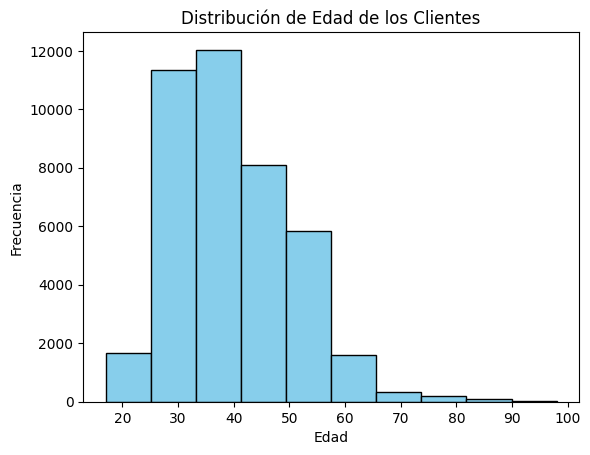

In [5]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black') #creo un histograma
plt.title('Distribución de Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia') #cuántos clientes hay en cada rango de edad.
plt.show()


**Trabajos mas frecuentes**

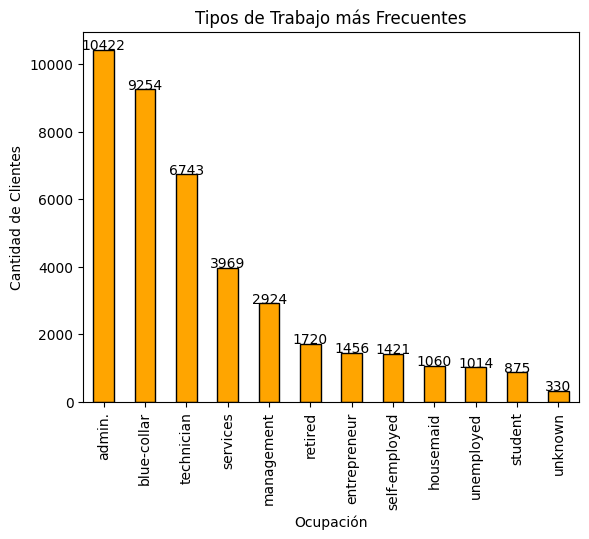

In [ ]:
# Conteo de los trabajos más frecuentes
counts = df['job'].value_counts().head(12)

# Gráfico de barras
ax = counts.plot(kind='bar', color='orange', edgecolor='black') #kind='bar': grafico de barras

# Agrego título y etiquetas
plt.title('Tipos de Trabajo más Frecuentes')
plt.xlabel('Ocupación')
plt.ylabel('Cantidad de Clientes')

# Agrego los números encima de cada barra
for i, v in enumerate(counts):
    ax.text(i, v + 5, str(v), ha='center')  # 'v+5' para que no choque con la barra

plt.show()

**Porcentaje de personas que aceptaron el producto**

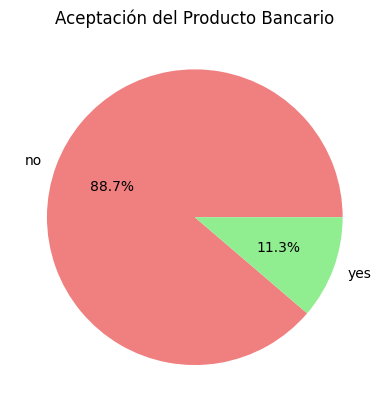

In [ ]:
df['y'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])#kind='pie': gráfico de pastel - autopct='%1.1f%%': significa un decimal y el símbolo %.
plt.title('Aceptación del Producto Bancario')
plt.ylabel('')
plt.show()


**Clientes que se interesaron por el producto teniendo en cuenta la tasa euribor** - *En argentina seria la tasa BADLAR/LELIQ*

/tmp/ipython-input-534587554.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_copy.groupby('euribor_range')['y']


y                    no       yes
euribor_range                    
<0%            0.000000  0.000000
0–1%           0.542989  0.457011
1–2%           0.842023  0.157977
2–3%           0.000000  0.000000
>3%            0.951808  0.048192


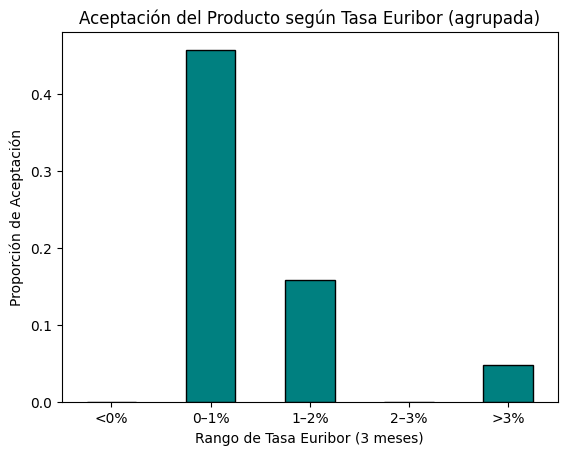

conclusion: muestra que los clientes se interesaron más por el producto cuando la tasa era moderada (0–1%), no cuando era muy baja o muy alta.


In [13]:

#tasa euribor: Es el porcentaje de interés que los bancos se cobran entre sí cuando se prestan dinero por un determinado plazo.
#si la tasa sube, los préstamos son más caros; si baja, son más baratos.
#en ARGENTINA → BADLAR o Leliq, refleja lo caro o barato que está el dinero en el sistema financiero loal

import pandas as pd
import matplotlib.pyplot as plt

# CreO una copia para no modificar el original
df_copy = df.copy()

# Creo rangos de tasas
bins = [-1.0, 0.0, 1.0, 2.0, 3.0, 5.0] # intervalos definidos los limites
labels = ['<0%', '0–1%', '1–2%', '2–3%', '>3%'] # a esos intervalos les pongo estos nombres
df_copy['euribor_range'] = pd.cut(df_copy['euribor3m'], bins=bins, labels=labels) #tomo la columna euribor3m y la convierto en categorías basadas en los intervalos (bins) definidos arriba

# Calculo que proporción de personas aceptó (o no) el producto en cada rango de tasa definido arriba
aceptacion = (
    df_copy.groupby('euribor_range')['y']
    .value_counts(normalize=True) #pongo normalize en true para que de proporciones (porcentaje relativo: ejemplo Y = 0.8 , N = 0.10), no cantidades absolutas.
    .unstack() #separa en 2 columnas Y / N con los resultados
    .fillna(0) #si en la columna hay algun dato vacio lo pone en 0
)

print(aceptacion)

# Graficar
aceptacion['yes'].plot(kind='bar', color='teal', edgecolor='black')
plt.title('Aceptación del Producto según Tasa Euribor (agrupada)')
plt.xlabel('Rango de Tasa Euribor (3 meses)')
plt.ylabel('Proporción de Aceptación')
plt.xticks(rotation=0) #para que queden horizontales (no verticales) lo que esta en el eje "x"
plt.show()

print("conclusion: muestra que los clientes se interesaron más por el producto cuando la tasa era moderada (0–1%), no cuando era muy baja o muy alta.")



**Ventas por mes**

y         no  yes
month            
apr     2093  539
aug     5523  655
dec       93   89
jul     6525  649
jun     4759  559
mar      270  276
may    12883  886
nov     3685  416
oct      403  315
sep      314  256


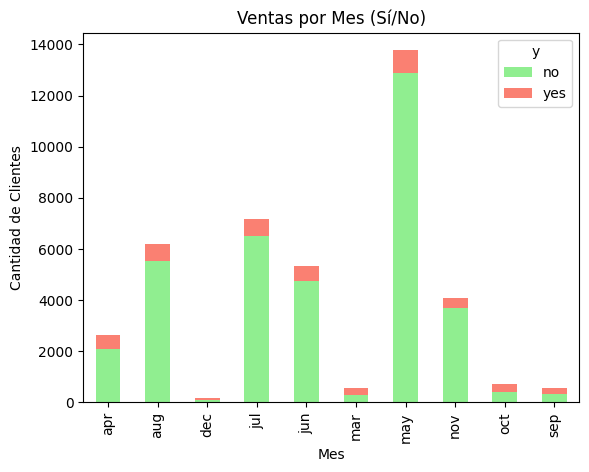

In [16]:
#VENTAS POR MES

ventas_por_mes = df.groupby([df['month'], 'y']).size().unstack(fill_value=0) #agrupo por mes y por si/no de cada mes y la cantidad separo en columnas con unstack (Y / N)
print(ventas_por_mes)

ventas_por_mes.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Ventas por Mes (Sí/No)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Clientes')
plt.show()